# **Inequality in NYC**

New York City consists of five boroughs: Manhattan, Queens, The Bronx, Brooklyn, and Staten Island. While New York City is known for wealth, booming industries, and job opportunities, there are also many individuals in many areas that struggle to live. According to The Center of [New York City Affairs](http://www.centernyc.org/inequality-poverty), approximately one in five New Yorkers lives in poverty and nearly half the city’s households are considered near poor.


## **Research Questions**
- How does housing accessibility and rent burden differ across New York City's boroughs?
- How does housing policy and inequality extend to educational inequality in New York City?
- To what extent does racial and socioeconomic segregation in New York City shape its student's educational opportunities and outcomes?

In our project, we chose to look at multiple datasets to see these varying trends and answer different parts of our questions.

## **Data Collection & Cleaning**

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

### Part One: Housing
**Dataset One**: [Housing and Rent Burden](https://data.cityofnewyork.us/City-Government/Demographics-and-profiles-at-the-Neighborhood-Tabu/hyuz-tij8)

First, we loaded out dataset and subsetted the data to only include values of percent of income spent on rent -- measuring burden of rent on a household. Additionally, we removed the last columns that included values for the Staten Island Cemetery. We then did the same operations with gross rent to create two different dataframes to look at. The heads of the two dataframes are displayed below.

In [118]:
# load csv and dropping rows
rent = pd.read_csv("rent.csv", skiprows=5)


# number of rows to drop 
n = 22
  
# dropping last n rows using drop 
rent.drop(rent.tail(n).index, inplace = True) 

# check
# print(rent.tail())

# keep only rent burden rows
rent_burden = rent[142:-2]

# keep only gross rent rows
gross_rent = rent[132:140]

# remove Staten Island Cemetery column
rent_burden = rent_burden.iloc[:,:-4]
gross_rent = gross_rent.iloc[:,:-4]


# check
# display(rent_burden.head())
# display(gross_rent.head())

# print(len(rent_burden), ' ', len(gross_rent))


After looking at these dataframes, we realized have a ton of unnecessary columns. We removed the estimates, margin of error, and percent margin of error columns and only kept the percent column. We performed this by only keeping every fourth column starting with the third column. Then we inserted back the first column which contained our descriptions/labels.

We performed this for both the rent_burden and gross_rent dataframes.

In [119]:
# for rent_burden
# get rid of estimates, MOE and Percent MOE columns - keep only percents
rent_burden_percent = rent_burden.iloc[:,3::4].copy()
# save the row names
rent_burden_row = rent_burden.iloc[:, 0].copy()
# insert first column back into dataframe
rent_burden_percent.insert(0, 'GRAPI', rent_burden_row)

# for gross_rent
# get rid of estimates, MOE and Percent MOE columns - keep only percents
gross_rent_percent = gross_rent.iloc[:,3::4].copy()
# save the row names
gross_rent_row = gross_rent.iloc[:, 0].copy()
# insert first column back into dataframe
gross_rent_percent.insert(0, 'Gross Rent', gross_rent_row)

# check
# display(rent_burden_percent.head())
# display(gross_rent_percent.head())


Next, we further cleaned the data by transposing the dataframes, renaming the columns to easier to read strings, then removed the unnamed column. After these operations, we transposed the dataframe back. We performed this on both the rent_burden and gross_rent dataframe.

In [120]:
# rent_burden
rent_burden_percent_t = rent_burden_percent.T
rent_burden_percent_t.rename(columns = {142 : 'occupied_units', 143 : '<15%', 144 : '15-19.9%', 145 : '20-24.9%', 146 : '25-29.9%',
                                         147 : '30-34.9%', 148 : '>35%', 149 : 'not_computed'}, inplace = True)

rent_burden_percent_t= rent_burden_percent_t.iloc[1:,1:8]


# print(rent_burden_percent_t.head())
# print(rent_burden_estimates_t.tail())

rent_burden_percent = rent_burden_percent_t.T
display(rent_burden_percent.head())
# display(rent_burden_percent.tail())


# gross_rent
gross_rent_percent_t = gross_rent_percent.T
gross_rent_percent_t.rename(columns = {132 : 'occupied_units', 133 : '<200', 134 : '200-299', 135 : '300-499', 136 : '500-749',
                                         137 : '750-999', 138 : '1000-1499', 139 : '>1500'}, inplace = True)

gross_rent_percent_t= gross_rent_percent_t.iloc[1:,1:8]


# print(rent_burden_percent_t.head())
# print(rent_burden_estimates_t.tail())

gross_rent_percent = gross_rent_percent_t.T
# display(gross_rent_percent.head())
# display(gross_rent_percent.tail())

,BK72 Williamsburg.2,BK73 North Side-South Side.2,BK76 Greenpoint.2,BK90 East Williamsburg.2,BK09 Brooklyn Heights-Cobble Hill.2,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill.2,BK68 Fort Greene.2,BK69 Clinton Hill.2,BK35 Stuyvesant Heights.2,BK75 Bedford.2,...,SI14 Grasmere-Arrochar-Ft. Wadsworth.2,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill.2,SI36 Old Town-Dongan Hills-South Beach.2,SI45 New Dorp-Midland Beach.2,SI01 Annadale-Huguenot-Prince's Bay-Eltingville.2,SI11 Charleston-Richmond Valley-Tottenville.2,SI25 Oakwood-Oakwood Beach.2,SI32 Rossville-Woodrow.2,SI48 Arden Heights.2,SI54 Great Kills.2
<15%,12.7,12.6,15.5,11.9,20.7,16.7,14.6,13.1,11,10.7,...,13.8,12.9,13.7,17.1,13.9,12.7,12.6,12,13.9,10.7
15-19.9%,5.4,11.6,12.7,13.3,15.8,14.8,13.4,13.4,10.8,11.3,...,13,15,10.5,9.7,17.2,12.3,16.9,20.5,24,21.9
20-24.9%,5.7,13,14.5,14.8,16.2,14.5,13.8,14.1,11.4,9.8,...,10.9,13.8,11.3,10.2,14.8,10.1,10.2,19.5,14.2,14.3
25-29.9%,9.8,10.4,12.2,12.6,13.8,13.6,13.4,11.9,11.4,11.6,...,12,7.8,6.8,9,9.4,9.2,12,4.3,5.4,11.4
30-34.9%,9,10.3,8.7,9,4.2,9.3,10,7.8,10.8,9.9,...,9.9,7.7,14.6,6.8,10.2,12.9,9.4,4.2,0.7,1.3


Next, we transposed both dataframes so that the rows would be the neighborhoods and the columns would be the categories of rent burden/gross rent. Then, we changed the string values in the dataframe to numeric values for both rent_burden_percent_transpose and gross_rent_percent_transpose. 

For rent_burden_percent_transpose, we calculated the sum of the percentage of households that were rent burdened (>30%) for each neighborhood and added a new column that categorized each neighborhood by borough (we created a list of the borough names that matched each column).

For gross_rent_percent_transpose, we created two new columns: one that summed percentage of households that paid high gross rent (greater than 1000) and one for low gross rent (less than 1000).

We created two subsets that only contained the new columns we created.

In [121]:
rent_burden_percent_transpose = rent_burden_percent.T
gross_rent_percent_transpose  = gross_rent_percent.T

rent_burden_percent_transpose['<15%'] = pd.to_numeric(rent_burden_percent_transpose['<15%'])
rent_burden_percent_transpose['15-19.9%'] = pd.to_numeric(rent_burden_percent_transpose['15-19.9%'])
rent_burden_percent_transpose['20-24.9%'] = pd.to_numeric(rent_burden_percent_transpose['20-24.9%'])
rent_burden_percent_transpose['25-29.9%'] = pd.to_numeric(rent_burden_percent_transpose['25-29.9%'])
rent_burden_percent_transpose['30-34.9%'] = pd.to_numeric(rent_burden_percent_transpose['30-34.9%'])
rent_burden_percent_transpose['>35%'] = pd.to_numeric(rent_burden_percent_transpose['>35%'])

gross_rent_percent_transpose['<200'] = pd.to_numeric(gross_rent_percent_transpose['<200'])
gross_rent_percent_transpose['200-299'] = pd.to_numeric(gross_rent_percent_transpose['200-299'])
gross_rent_percent_transpose['300-499'] = pd.to_numeric(gross_rent_percent_transpose['300-499'])
gross_rent_percent_transpose['500-749'] = pd.to_numeric(gross_rent_percent_transpose['500-749'])
gross_rent_percent_transpose['750-999'] = pd.to_numeric(gross_rent_percent_transpose['750-999'])
gross_rent_percent_transpose['>1500'] = pd.to_numeric(gross_rent_percent_transpose['>1500'])

borough = []
for col in rent_burden_percent:
    if col.startswith('BK'):
        borough.append('Brooklyn')
    if col.startswith('BX'):
        borough.append('Bronx')
    if col.startswith('MN'):
        borough.append('Manhattan')
    if col.startswith('QN'):
        borough.append('Queens')
    if col.startswith('SI'):
        borough.append('Staten Island')

rent_burden_percent_transpose['rent_burdened'] = (rent_burden_percent_transpose[['30-34.9%','>35%']]).sum(axis=1)
rent_burden_percent_transpose['borough'] = borough

gross_rent_percent_transpose['low_rent'] = (gross_rent_percent_transpose[['<200','200-299', '300-499', '750-999']]).sum(axis=1)
gross_rent_percent_transpose['high_rent'] = (gross_rent_percent_transpose[['1000-1499','>1500']]).sum(axis=1)

rent_burden_percent_sub = rent_burden_percent_transpose.iloc[:,6:]
# display(rent_burden_percent_sub.head())

gross_rent_percent_sub = gross_rent_percent_transpose.iloc[:,7:]
# display(gross_rent_percent_sub.head())

display(rent_burden_percent_transpose.tail())
display(gross_rent_percent_transpose.head())

,<15%,15-19.9%,20-24.9%,25-29.9%,30-34.9%,>35%,rent_burdened,borough
SI11 Charleston-Richmond Valley-Tottenville.2,12.7,12.3,10.1,9.2,12.9,42.8,55.7,Staten Island
SI25 Oakwood-Oakwood Beach.2,12.6,16.9,10.2,12.0,9.4,39.0,48.4,Staten Island
SI32 Rossville-Woodrow.2,12.0,20.5,19.5,4.3,4.2,39.4,43.6,Staten Island
SI48 Arden Heights.2,13.9,24.0,14.2,5.4,0.7,41.8,42.5,Staten Island
SI54 Great Kills.2,10.7,21.9,14.3,11.4,1.3,40.4,41.7,Staten Island


,<200,200-299,300-499,500-749,750-999,1000-1499,>1500,low_rent,high_rent
BK72 Williamsburg.2,3.8,13.8,15.4,14.3,14.0,23.9,14.8,47.0,14.8
BK73 North Side-South Side.2,1.5,6.3,6.8,12.3,12.8,16.9,43.4,27.4,43.4
BK76 Greenpoint.2,0.6,1.3,2.6,5.5,15.1,32.9,41.9,19.6,41.9
BK90 East Williamsburg.2,0.7,7.1,5.7,14.5,15.7,22.1,34.3,29.2,34.3
BK09 Brooklyn Heights-Cobble Hill.2,0.2,1.4,2.1,5.3,8.0,18.5,64.6,11.7,64.6


After transposing the dataframes, we reset the index of the dataframes to create a neighborhood column. Then we merged rent_burden_percent_sub and gross_rent_percent_sub. After looking at the dataset, we found missing values for Rikers Island (a prison), Queens Airport, and Manhattan Cemetery so we dropped these rows by only keeping the rows where rent burdened was at least 1.

In [122]:
rent_burden_percent_sub.reset_index(inplace=True)
#rent_burden_percent_sub = rent_burden_percent_sub.rename(columns = {'Neighborhood'})

gross_rent_percent_sub.reset_index(inplace=True)
#gross_rent_percent_sub = gross_rent_percent_sub.rename(columns = {'Neighborhood'})

burden_gross = rent_burden_percent_sub.merge(gross_rent_percent_sub)
burden_gross = burden_gross.rename(columns = {'index':'neighborhood'})

# i = burden_gross[((burden_gross.rent_burdened <1)& (burden_gross.low_rent<1) & (burden_gross.high_rent<1))].index
# burden_gross.drop(i)

# Drop Rikers Island, Queens Airport, and Manhattan Cemetery Rows
burden_gross = burden_gross[burden_gross['rent_burdened']>1]

display(burden_gross.head())

,neighborhood,rent_burdened,borough,low_rent,high_rent
0,BK72 Williamsburg.2,66.4,Brooklyn,47.0,14.8
1,BK73 North Side-South Side.2,52.3,Brooklyn,27.4,43.4
2,BK76 Greenpoint.2,45.1,Brooklyn,19.6,41.9
3,BK90 East Williamsburg.2,47.4,Brooklyn,29.2,34.3
4,BK09 Brooklyn Heights-Cobble Hill.2,33.6,Brooklyn,11.7,64.6


In [123]:
rent_burden_percent['brooklyn'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('BK')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BK')])
# print(rent_burden_percent['brooklyn'])


rent_burden_percent['bronx'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('BX')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('BX')])
# print(rent_burden_estimates['bronx'])

rent_burden_percent['manhattan'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('MN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('MN')])
# print(rent_burden_estimates['manhattan'])

rent_burden_percent['queens'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('QN')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('QN')])
# print(rent_burden_estimates['queens'])

rent_burden_percent['staten'] = rent_burden_percent.loc[:,rent_burden_percent.columns.str.startswith('SI')].median(axis=1)
# print(rent_burden_estimates.loc[:,rent_burden_estimates.columns.str.startswith('SI')])
# print(rent_burden_estimates['staten'])

Lastly, we prepare our dataframe to merge with subsequent dataframes by indicating the community district of each of the boroughs manually.

In [124]:
burden_gross.head()
community_district = ['BK 01', 'BK 01','BK 01', 'BK 01','BK 02', 'BK 02', 'BK 02', 'BK 02','BK 03','BK 03', 'BK 04', 'BK 04', 'BK 04',
                     'BK 05', 'BK 05', 'BK 05','BK 06','BK 06','BK 07', 'BK 07', 'BK 07', 'BK 08', 'BK 08', 'BK 09','BK 09',
                     'BK 10','BK 10','BK 11', 'BK 11','BK 11','BK 12', 'BK 12', 'BK 12','BK 13', 'BK 13', 'BK 13', 'BK 13',
                     'BK 14','BK 14','BK 15', 'BK 15', 'BK 15', 'BK 16', 'BK 16', 'BK 16','BK 17', 'BK 17', 'BK 17',
                     'BK 18', 'BK 18', 'BK 18',
                     'BX 02', 'BX 02','BX 01', 'BX 01','BX 03', 'BX 06', 'BX 06', 'BX 03', 'BX 03','BX 04','BX 04','BX 04',
                     'BX 05','BX 05','BX 05','BX 07', 'BX 07','BX 07', 'BX 08', 'BX 08','BX 08','BX 09','BX 09','BX 09','BX 09','BX 09',
                     'BX 10', 'BX 10','BX 10','BX 11','BX 11','BX 11','BX 11','BX 12','BX 12','BX 12','BX 12',
                     'MN 02','MN 02','MN 01','MN 03','MN 03','MN 03','MN 04', 'MN 04', 'MN 05','MN 06','MN 06','MN 06','MN 06',
                     'MN 07','MN 07', 'MN 08','MN 08','MN 08', 'MN 09','MN 09','MN 09','MN 10','MN 10', 'MN 11','MN 11',
                     'MN 12','MN 12','MN 12',
                     'QN 01','QN 01','QN 01','QN 01','QN 01','QN 02','QN 02','QN 02','QN 03','QN 03','QN 03','QN 04', 'QN 04',
                     'QN 05','QN 05','QN 05','QN 05','QN 06','QN 06','QN 07','QN 07','QN 07','QN 07','QN 07','QN 07','QN 07', 'QN 08',
                     'QN 08','QN 08','QN 08','QN 08','QN 09','QN 09','QN 09','QN 10','QN 10','QN 10', 'QN 11','QN 11','QN 11','QN 11',
                     'QN 12','QN 12','QN 12','QN 12','QN 12','QN 12','QN 13','QN 13','QN 13','QN 13','QN 13','QN 13','QN 13',
                     'QN 14','QN 14','QN 14',
                     'SI 01','SI 01','SI 01','SI 01','SI 01','SI 01','SI 01','SI 02','SI 02','SI 02','SI 02','SI 02',
                     'SI 03','SI 03','SI 03','SI 03','SI 03','SI 03']
burden_gross['district'] = community_district
display(burden_gross)

,neighborhood,rent_burdened,borough,low_rent,high_rent,district
0,BK72 Williamsburg.2,66.4,Brooklyn,47.0,14.8,BK 01
1,BK73 North Side-South Side.2,52.3,Brooklyn,27.4,43.4,BK 01
2,BK76 Greenpoint.2,45.1,Brooklyn,19.6,41.9,BK 01
3,BK90 East Williamsburg.2,47.4,Brooklyn,29.2,34.3,BK 01
4,BK09 Brooklyn Heights-Cobble Hill.2,33.6,Brooklyn,11.7,64.6,BK 02
...,...,...,...,...,...,...
189,SI11 Charleston-Richmond Valley-Tottenville.2,55.7,Staten Island,12.7,40.8,SI 03
190,SI25 Oakwood-Oakwood Beach.2,48.4,Staten Island,22.8,22.4,SI 03
191,SI32 Rossville-Woodrow.2,43.6,Staten Island,18.2,27.9,SI 03
192,SI48 Arden Heights.2,42.5,Staten Island,19.9,29.6,SI 03


Finally, we have a dataset comprised of two columns -- district and rent_burdened to be able to be merge with other datasets.

In [125]:
housing = burden_gross.groupby(['district'])['rent_burdened'].mean().reset_index()
housing = housing.sort_values('district')

housing.reset_index(inplace=True)
housing = housing.drop(columns=['index'])
display(housing[0:20])

,district,rent_burdened
0,BK 01,52.800000
1,BK 02,41.550000
2,BK 03,56.050000
3,BK 04,56.733333
4,BK 05,57.533333
5,BK 06,40.700000
6,BK 07,52.900000
7,BK 08,48.250000
8,BK 09,58.400000
9,BK 10,52.700000


We realized that we wanted to include demographic data, but we could not find any demographic datasets of New York City with the parameters we needed. The closest data we found individually described each of the community districts so we made the decision to manually add the rows in ourselves. The data that we used can be found at the [NYC Planning Community District Profiles](https://communityprofiles.planning.nyc.gov/about).

In [126]:
minority = [37, 53.6, 74, 81.1, 96.3, 35.9, 75.6, 77.7, 77.2, 45.4, 59.8, 28.9, 44.1, 59.2, 34.5, 97.4, 97.3, 77.3,
           98, 98, 96, 98, 98.9, 96, 94.2, 67.7, 97.1, 72.5, 78.3, 93.7,
           27.8, 27.8, 66.7, 40.9, 40.9, 30.3, 32, 24.7, 72.4, 85.8, 86.3, 81.1,
           51.7, 71.1, 89.6, 93.8, 48.3, 52.3, 74.6, 70.1, 82, 78.5, 60.6, 98.2, 89.1, 65.8, 
           62.3, 33.9, 17.1]

housing['minority_rate']= minority

### Part Two: Poverty
**Dataset Two**: [Poverty and Indicators](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/hveh-vctc).


First, we load in our poverty datase.

In [127]:
poverty = pd.read_csv("poverty.csv")
display(poverty.head())

,Geography,Name,Level,Poverty_Rate_2017
0,NYC,New York City,City,18.0%
1,BX,The Bronx,Boro,28.0%
2,BK,Brooklyn,Boro,19.8%
3,MN,Manhattan,Boro,16.2%
4,QN,Queens,Boro,12.1%


Next, we drop the summary rows and sort alphabetically by borough to match our previous dataset. Then, we reset our index.

In [128]:
poverty = poverty.iloc[6:]

poverty = poverty.sort_values('Geography')

poverty.reset_index(inplace=True)

poverty = poverty.drop(columns=['index', 'Level'])
display(poverty[0:20])

,Geography,Name,Poverty_Rate_2017
0,BK 01,Greenpoint/Williamsburg,23.3%
1,BK 02,Fort Greene/Brooklyn Heights,14.9%
2,BK 03,Bedford Stuyvesant,24.4%
3,BK 04,Bushwick,27.1%
4,BK 05,East New York/Starrett City,24.7%
5,BK 06,Park Slope/Carroll Gardens,7.8%
6,BK 07,Sunset Park,22.1%
7,BK 08,Crown Heights/Prospect Heights,20.0%
8,BK 09,South Crown Heights/Lefferts Gardens,19.1%
9,BK 10,Bay Ridge/Dyker Heights,15.2%


Finally, we added another column that indicated the overall borough the district was in.

In [129]:
borough = []
for col in poverty['Geography']:
    if col.startswith('BK'):
        borough.append('Brooklyn')
    if col.startswith('BX'):
        borough.append('Bronx')
    if col.startswith('MN'):
        borough.append('Manhattan')
    if col.startswith('QN'):
        borough.append('Queens')
    if col.startswith('SI'):
        borough.append('Staten Island')
poverty['borough'] = borough

Next, we renamed our columns to have the same syntax as our housing dataframe for uniformity, and changed the poverty rate column from strings to floats.

In [130]:
poverty = poverty.rename(columns = {'Geography':'district', 'Name':'neighborhood','Poverty_Rate_2017':'poverty_rate'})

poverty['poverty_rate'] = poverty['poverty_rate'].str.rstrip('%').astype('float')

display(poverty.head())

,district,neighborhood,poverty_rate,borough
0,BK 01,Greenpoint/Williamsburg,23.3,Brooklyn
1,BK 02,Fort Greene/Brooklyn Heights,14.9,Brooklyn
2,BK 03,Bedford Stuyvesant,24.4,Brooklyn
3,BK 04,Bushwick,27.1,Brooklyn
4,BK 05,East New York/Starrett City,24.7,Brooklyn


**Dataset Three**: [Population](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2)

We wanted to get a good sense of the magnitude of poverty levels in each of the districts, so we also decided to look at population levels in each of the community districts. In order to clean it to make it mergable with our poverty dataframe, we create a new column with the same community district names and sorted our datframe alphabetically by this column


In [131]:
population = pd.read_csv("population.csv")
borough1 = ['BX 01','BX 02','BX 03', 'BX 04', 'BX 05', 'BX 06', 'BX 07', 'BX 08', 'BX 09', 'BX 10', 'BX 11', 'BX 12',
          'BK 01', 'BK 02', 'BK 03', 'BK 04' ,'BK 05', 'BK 06', 'BK 07', 'BK 08', 'BK 09', 'BK 10', 'BK 11', 'BK 12',
          'BK 13', 'BK 14', 'BK 15', 'BK 16', 'BK 17', 'BK 18',
          'MN 01', 'MN 02', 'MN 03', 'MN 04', 'MN 05','MN 06', 'MN 07', 'MN 08', 'MN 09', 'MN 10', 'MN 11', 'MN 12',
          'QN 01', 'QN 02', 'QN 03', 'QN 04', 'QN 05','QN 06','QN 07','QN 08','QN 09', 'QN 10','QN 11','QN 12','QN 13','QN 14',
          'SI 01', 'SI 02', 'SI 03']
population['district'] = borough1
population = population.sort_values('district')
population.reset_index(inplace=True)

population = population.drop(columns=['index'])
display(population.head())

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,district
0,Brooklyn,1,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083,BK 01
1,Brooklyn,2,"Brooklyn Heights, Fort Greene",110221,92732,94534,98620,99617,BK 02
2,Brooklyn,3,Bedford Stuyvesant,203380,133379,138696,143867,152985,BK 03
3,Brooklyn,4,Bushwick,137902,92497,102572,104358,112634,BK 04
4,Brooklyn,5,"East New York, Starrett City",170791,154931,161350,173198,182896,BK 05


We then added the 2010 (latest estimate) poulation of each of the community districts to our poverty dataframe.

In [132]:
poverty['population'] = population['2010 Population']
poverty.head()

,district,neighborhood,poverty_rate,borough,population
0,BK 01,Greenpoint/Williamsburg,23.3,Brooklyn,173083
1,BK 02,Fort Greene/Brooklyn Heights,14.9,Brooklyn,99617
2,BK 03,Bedford Stuyvesant,24.4,Brooklyn,152985
3,BK 04,Bushwick,27.1,Brooklyn,112634
4,BK 05,East New York/Starrett City,24.7,Brooklyn,182896


**Combining Housing and Poverty**

In [133]:
housing_poverty = poverty.merge(housing, on = 'district')
display(housing_poverty[0:15])

,district,neighborhood,poverty_rate,borough,population,rent_burdened,minority_rate
0,BK 01,Greenpoint/Williamsburg,23.3,Brooklyn,173083,52.800000,37.0
1,BK 02,Fort Greene/Brooklyn Heights,14.9,Brooklyn,99617,41.550000,53.6
2,BK 03,Bedford Stuyvesant,24.4,Brooklyn,152985,56.050000,74.0
3,BK 04,Bushwick,27.1,Brooklyn,112634,56.733333,81.1
4,BK 05,East New York/Starrett City,24.7,Brooklyn,182896,57.533333,96.3
5,BK 06,Park Slope/Carroll Gardens,7.8,Brooklyn,104709,40.700000,35.9
6,BK 07,Sunset Park,22.1,Brooklyn,126230,52.900000,75.6
7,BK 08,Crown Heights/Prospect Heights,20.0,Brooklyn,96317,48.250000,77.7
8,BK 09,South Crown Heights/Lefferts Gardens,19.1,Brooklyn,98429,58.400000,77.2
9,BK 10,Bay Ridge/Dyker Heights,15.2,Brooklyn,124491,52.700000,45.4


### Part Three: Education

In [110]:
## load data
school_data = pd.read_csv("Ny_School.csv")
housing_data = pd.read_csv("Student_Temp_Housing.csv")

#### Renaming Columns
In this section, we renamed the columns by making them lower_case and replacing spaces in order to make them easier to work with.

In [111]:
new_colnames = []
for col in school_data.columns:
    new_colnames.append(col.lower())
    
new_colnames_2 = []
for col in housing_data.columns:
    new_colnames_2.append(col.lower())
    for col in range(len(new_colnames)):
        new_colnames[col] = new_colnames[col].replace(" ", "_")
print (new_colnames)

sdata = school_data.copy()
sdata.columns = new_colnames

for col in range(len(new_colnames_2)):
    new_colnames_2[col] = new_colnames_2[col].replace(" ", "_")
print (new_colnames_2)

sdata = school_data.copy()
sdata.columns = new_colnames

hdata = housing_data.copy()
hdata.columns = new_colnames_2

['dbn', 'school_name', 'year', 'total_enrollment', 'grade_pk_(half_day_&_full_day)', 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', '#_female', '%_female', '#_male', '%_male', '#_asian', '%_asian', '#_black', '%_black', '#_hispanic', '%_hispanic', '#_multiple_race_categories_not_represented', '%_multiple_race_categories_not_represented', '#_white', '%_white', '#_students_with_disabilities', '%_students_with_disabilities', '#_english_language_learners', '%_english_language_learners', '#_poverty', '%_poverty', 'economic_need_index']
['dbn', 'school_name', '#_total_students', '#_students_in_temporary_housing', '%_students_in_temporary_housing', '#_students_residing_in_shelter', '#_residing_in_dhs_shelter', '#_residing_in_non-dhs_shelter', '#_doubled_up']


#### Dropping Columns
Then, we dropped the columns we did not need, only keeping ones relative to our research question which involved keeping school demographic (race make-up), poverty, and students in temporary housing data.

In [112]:
sdata.drop(sdata.loc[:,["total_enrollment", "#_female", "%_female", "#_male", "%_male", "#_black", "#_white", "#_asian", "#_hispanic", "#_multiple_race_categories_not_represented", "#_students_with_disabilities", "#_english_language_learners", "%_students_with_disabilities", "#_poverty", "%_multiple_race_categories_not_represented", "%_english_language_learners", "economic_need_index"]], inplace = True, axis = 1)
sdata.drop(sdata.loc[:,["grade_pk_(half_day_&_full_day)", 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12']], inplace = True, axis = 1)
display(sdata.head())

hdata.drop(hdata.loc[:, ['#_doubled_up', "school_name", '#_residing_in_non-dhs_shelter', '#_doubled_up'  ]], inplace = True, axis = 1)
display(hdata.head())

,dbn,school_name,year,%_asian,%_black,%_hispanic,%_white,%_poverty
0,01M015,P.S. 015 Roberto Clemente,2014-15,0.044,0.355,0.585,0.011,0.923
1,01M015,P.S. 015 Roberto Clemente,2015-16,0.051,0.324,0.597,0.011,0.847
2,01M015,P.S. 015 Roberto Clemente,2016-17,0.079,0.287,0.590,0.022,0.854
3,01M015,P.S. 015 Roberto Clemente,2017-18,0.105,0.274,0.579,0.032,0.847
4,01M015,P.S. 015 Roberto Clemente,2018-19,0.138,0.276,0.546,0.034,0.833


,dbn,#_total_students,#_students_in_temporary_housing,%_students_in_temporary_housing,#_students_residing_in_shelter,#_residing_in_dhs_shelter
0,01M015,187,67,0.36,16,6
1,01M019,274,34,0.12,19,s
2,01M020,512,95,0.19,41,26
3,01M034,348,84,0.24,46,34
4,01M063,212,52,0.25,13,s


#### Adding Columns and Grouping
In this section, we added two new columns in borough + district and boroughs so that we could group by both. In order to achieve this, we wrote two functions which took the dbn school number and converted them to specific boroughs and districts. Then, we grouped all the data by the boroughs and districts, replaced "suppressed values" with 0, and rounded and converted the decimals to percentages.

In [113]:
def label_borough(col):
    district_number = col['dbn'][0:2]
    if col['dbn'].find("M") == 2:
      return 'Manhattan ' + district_number
    if col['dbn'].find("K") == 2:
      return 'Brooklyn ' + district_number
    if col['dbn'].find("X") == 2 :
      return 'Bronx ' + district_number
    if col['dbn'].find("Q") == 2:
      return 'Queens ' + district_number
    if col['dbn'].find("R") == 2:
      return 'Staten Island ' + district_number

def labelBorough(col):
    if col['borough_and_district_#'].find("Manhattan") != -1:
      return 'Manhattan'
    if col['borough_and_district_#'].find("Brooklyn") != -1:
      return 'Brooklyn'
    if col['borough_and_district_#'].find("Bronx") != -1:
      return 'Bronx'
    if col['borough_and_district_#'].find("Queens") != -1:
      return 'Queens'
    if col['borough_and_district_#'].find("Staten Island")!= -1:
      return 'Staten Island'


sdata['borough_and_district_#'] = sdata.apply (lambda col: label_borough(col), axis=1)

sdata = sdata.groupby(['borough_and_district_#'], as_index=False).mean()

sdata.iloc[:,1:6] = sdata.iloc[:,1:6].mul(100).round(2)
display(sdata.head())

hdata = hdata.replace("s", 0)

hdata['borough_and_district_#'] = hdata.apply (lambda col: label_borough(col), axis=1)

hdata["%_students_in_temporary_housing"] = pd.to_numeric(hdata["%_students_in_temporary_housing"])
hdata["#_total_students"] = pd.to_numeric(hdata["#_total_students"])
hdata["#_students_residing_in_shelter"] = pd.to_numeric(hdata["#_students_residing_in_shelter"])

hdata = hdata.groupby(['borough_and_district_#'], as_index=False).mean()
hdata["borough"] = hdata.apply(lambda col: labelBorough(col), axis=1)
hdata.iloc[:,2] = hdata.iloc[:,2].mul(100).round(2)
hdata.iloc[: ,1:4] = hdata.iloc[: ,1:4].round(2)

display(hdata.head())

,borough_and_district_#,%_asian,%_black,%_hispanic,%_white,%_poverty
0,Bronx 07,1.10,26.60,69.87,1.42,91.76
1,Bronx 08,5.04,24.28,64.12,5.17,81.42
2,Bronx 09,1.50,28.60,67.84,1.24,90.82
3,Bronx 10,4.41,17.52,72.22,4.41,85.26
4,Bronx 11,6.76,40.91,42.18,8.06,78.04


,borough_and_district_#,#_total_students,%_students_in_temporary_housing,#_students_residing_in_shelter,borough
0,Bronx 07,458.76,18.00,34.31,Bronx
1,Bronx 08,508.66,14.73,31.05,Bronx
2,Bronx 09,515.24,21.07,43.58,Bronx
3,Bronx 10,644.69,18.66,28.36,Bronx
4,Bronx 11,643.30,11.88,25.68,Bronx


#### Merging the two datasets
For this step, we created the final dataframe by merging both the education and housing data by borough and district number using the merge method.

In [114]:
final_ds = pd.merge(sdata, hdata, on = "borough_and_district_#", how = "inner")
final_ds.head()

,borough_and_district_#,%_asian,%_black,%_hispanic,%_white,%_poverty,#_total_students,%_students_in_temporary_housing,#_students_residing_in_shelter,borough
0,Bronx 07,1.10,26.60,69.87,1.42,91.76,458.76,18.00,34.31,Bronx
1,Bronx 08,5.04,24.28,64.12,5.17,81.42,508.66,14.73,31.05,Bronx
2,Bronx 09,1.50,28.60,67.84,1.24,90.82,515.24,21.07,43.58,Bronx
3,Bronx 10,4.41,17.52,72.22,4.41,85.26,644.69,18.66,28.36,Bronx
4,Bronx 11,6.76,40.91,42.18,8.06,78.04,643.30,11.88,25.68,Bronx


## **Data Description and Limitations**

### Dataset One: [Housing](https://data.cityofnewyork.us/City-Government/Demographics-and-profiles-at-the-Neighborhood-Tabu/hyuz-tij8)

##### Description
* The original dataset had different rows be the housing characteristics from rent, household type, rent burden, etc… and the columns were the different neighborhoods. The cleaned data set had the rows be the percent burden of rent and the columns be the five boroughs in NYC.
* This dataset was created as a part of an initiative to increase transparency, accessibility, and accountability of the City government.
* According to their website, NYC Open Data makes the wealth of public data generated by various New York City agencies and other City organizations available for public use. It is funded by the New York City government. This specific dataset was provided by the Department of City Planning.
* Many different politics/policies in NYC affect what type of data is collected. There are many different reasons why these estimates might not be an accurate representation of differences across boroughs including homelessness, lack of documentation, people over or underreporting their income, etc… 
* We dropped rows of unnecessary housing data that did not look at the rent burden. We also dropped unnecessary neighborhoods that had missing values such as the Staten Island Cemetery. We further cleaned the data by only looking at the median estimates by borough, and median percent estimates by borough and dropped all other columns.
* Since this is not personalized data, the people involved might not be fully aware that their data is being used and collected. However, since it is in aggregate form there should be no privacy or expectation concerns.
* The raw dataset can be found [here](https://drive.google.com/file/d/1mL4DjAYRaL2f184_WdoQd-u0ETNvYvgU/view?usp=sharing).

##### Limitiations
* This data shows five year estimates from 2008-2012, so we don't get a glimpse of what is happening year to year and how the rent burden is changing for each district -- it might be getting better or worse for some districts and we cannot exactly tell from the data. Furthermore, this data is quite old and does not take into acccount recent political events and policies that likely have afffected housing policy in NYC.

### Dataset Two: [Poverty](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/hveh-vctc).
##### Description
* The original dataset is fairly simple - it lists the poverty rate of each community district in NYC and also has rows for a summary of each f the boroughs.
* This dataset comes from NYC Open Data as well, as a part of an initiative to increase transparency, accessibility, and accountability of the City government and made possible through funding by the NYC government. This specific dataset came from the Mayor's Office for Econnomic Opportunity.
* Many different politics/policies in NYC affect what type of data is collected. There are many different reasons why these estimates might not be an accurate representation of differences across boroughs including homelessness, lack of documentation, people over or underreporting their income, etc… 
* To clean this dataset, we dropped the summary rows, created a new column to indicate what overall borough the community district was in, convert the percentages to floats for calculations, and sorted it alphabetically by community district.
* The NYCgov poverty rate is measured in a different way than the overall US poverty rate. According to their [website](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/poverty-measure.page), the measure includes a threshold that accounts for the higher cost of housing in New York City and incorporates the value of programs intended to alleviate poverty; adjusting family incomes for benefits such as the Supplemental Nutritional Assistance Program (SNAP) and the Earned Income Tax Credit.
* Since this data is aggregated, there should be no privacy or expectation concerns for the individual.
* The raw dataset can be found [here](https://drive.google.com/file/d/1O_JcvgjGhp79fMZrFzXZX3dnw3ZlMXKL/view?usp=sharing).

##### Limitations
* This poverty measure only looks at a specific point in time - 2018 - so we cannot see how poverty levels have changed over time for the community districts which would definitely have an impact on our overall analysis.

### Dataset Three: [Population](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2)
##### Description
* The orginal dataset looked at population levels across community districts at different points in time -- 1970, 1980, 1990, 2000, and 2010, collected Census Bureaus' Decennial data dissemination. We cleaned our data to only look at the most recent measure of population (2010), that better aligns with our times of our other datasets.
* We had to create a new column that combined distict and community number to be able to merge with our other datsets.
* The data was provided by the Department of City Planning is owned by NYC Open Data.
* We used this data to provide a magnitude measurement for our levels of poverty and rent burden, so we have a better understanding of how many people are affected across districts since popoulation levels vary. 
* This data is not personalized and does not provide any sensitive information so there should be no privacy concerns.
* The raw dataset can be found [here](https://drive.google.com/file/d/1T_HYEXvHoydxVDyuijdM2dSu0P1zM-lZ/view?usp=sharing).

##### Limitations
* This measure of population is perpetually changing and being a decade old, is not an extremely accurate measure of population levels right now. However, it does align with our other datasets so it gives us a good look into the general trend.
* Census data itself always has its limitations -- people being missed, double reported, inaccurate responses. There is no way to completely know.

### Dataset Four: Student Temp Housing
##### Data Description
* For the finalized dataset for housing and education data, we combined two datasets. The rows represent different boroughs and school districts within New York City. The columns make up different demographics, including percentage of Asian, Black, Hispanic, White, and other races, along with percentage of students in poverty. Additionally, they show the total number of students at each public school regardless of housing situation, students residing in shelter, the number and percent of students in temporary housing. 
* Poverty is measured by students who qualify for a free or reduced price lunch program or those eligible for Human Resources Administration benefits. Students in temporary housing are defined as any student 21 or younger enrolled in school and experiencing housing instability at any point during the school year. Temporary housing includes sharing the housing of others, in shelter, in hotel/motel, or in other temporary housing. The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. In 2017-18, there were 105,261 students residing in temporary housing at any point throughout the school year.  
* The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. 
* The final, revised dataset was created in order to study relationships between districts and specific demographics in order to find insights into poverty levels and temporary housing numbers within the districts. 
* The data was collected using multiple data sources, including the DOE's Audited Register, biographic data from the Automate the Schools (ATS) system, and the Location Code Generation and Management System (LCGMS), and the Department of Homeless Services (DHS). Due to the occasional missing demographic data and long-term-absent students not being accounted for, some of the enrollment numbers do not add up. The people surveyed (students within New York City) are probably aware that their demographic and free lunch status is recorded but this information does not affect the data. 
* The original data set can be found [here](https://drive.google.com/drive/folders/1B8daIcWqa5voZ6YwI-Jy1ZA4WMcZJdzW?usp=sharing).

##### Data Limitations
* One significant limitation within the dataset is that only public schools are accounted for (tne school data accounts for charter schools while the housing data does not). The absense of private schools in the dataset results in inflated poverty, racial minority percentages, and housing data for each district as private schools historically account for a higher level of wealthier and white students due to the tuition and prep needed to admitted.
* Regarding the housing data, The Federal McKinney-Vento Homeless Assistance Act requires school districts to ask families to report on their housing situation. Schools are only required to provide the survey when they are aware that there is a change in address so there may be instances where schools have outdated information. Additionally, families might lie about the state of housing in their families in the questionnaires as they do not want schools prying into their family situation so as a result, the actual temporary housing numbers might be lower than they actually are. 

## **Analysis**

Inequality is rampant in New York City. Under the shadows of skyscrapers, tourism, and economic boom, many households struggle to keep up with high rent prices an. In our project we explore the disparities in housing insecurity/rent burden and education across New York City's five boroughs.

In our final report, we vow to present the following analyses:

#### Analysis One:
We will plot rent burden (defined as paying >30% income level) by rent level for different neighborhoods grouped by borough to analyze if there is an association between rent level and rent burden. Especically given the economic downturn, we want to look at how housing insecurity has been exacerbated, especially for those already living in low income areas.


#### Analysis Two: 
We will look at the type of relationship and correlation between rent burden and minority levels for each of the community districts and determine if there are any statistical differences.

#### Analysis Three:

We will analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity may change based on race. 
We looked at a line plot that compared our average rent burden percents by borough.


### **Analysis One**
First, we look at how rent burden differs across different boroughs.

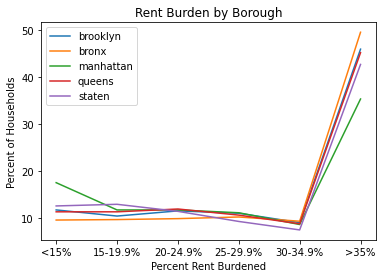

In [115]:
# subset to only include average borough columns
rent_burden_percent = rent_burden_percent[['brooklyn', 'bronx', 'manhattan', 'queens', 'staten']] 
# display(rent_burden_percent)

rent_burden_percent.plot.line()
plt.xlabel("Percent Rent Burdened")
plt.ylabel("Percent of Households")
plt.title('Rent Burden by Borough')
plt.show()


In this cleaned dataset, we see the median percent of households that are under each division of rent burden by each borough in New York City. Across all boroughs, residents spend a very large amount of their income on rent. 

While the differences in rent burden between boroughs do not seem that jarring, one large difference is what we see residents in the Bronx pay as a percent of their income vs residents in Manhattan. The percentage of residents that spend more than 35% of their income on living is nearly 50%, while the percent of residents that pay the same income burden on rent in Manhattan is only 35%. If we were also to compare [poverty levels](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/data-tool.page) from the same time end - 2012, we see that Staten Island held the lowest poverty level at 13.4%, Manhattan the second lowest at 14.7%, Queens at 21.8%, Brooklyn at 22.3%, and the Bronx at 25.2%. 

The comparisons between poverty and income show us that in neighborhoods that face higher poverty levels, they may actually be more burdened by rent than their wealthier counterparts. This demonstrates a discrepancy in the quality of life and wealth that can be accumulated across boroughs.

Next, we look at how rent burden changes based on rent level, specifically based on percentage of households paying low rent. 

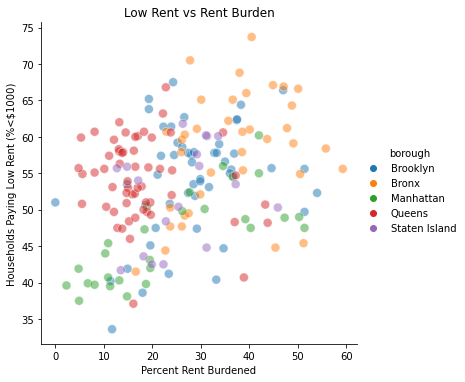

In [89]:
# display(burden_gross.head())

sns.relplot(x='low_rent', y='rent_burdened', hue="borough", s=80, alpha=.5, data=burden_gross);
plt.xlabel("Percent Rent Burdened")
plt.ylabel("Households Paying Low Rent (%<$1000)")
plt.title('Low Rent vs Rent Burden')
plt.show()

In the scatterplot, we can see that there seems to be no overall correlation, but there is significant variation between the different boroughs. We then used a multivariable linear regression to calculate the regression slope of percentage of households paying low rent vs percentage of households facing rent burden, taking borough into account.

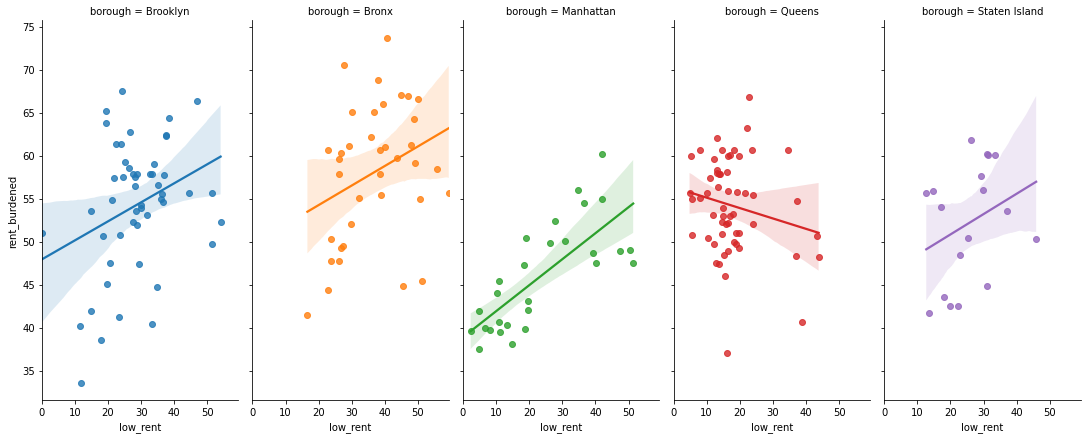

Low Rent Coefficient: 0.18


In [90]:
# display(burden_gross.head())

sns.lmplot(x='low_rent', y='rent_burdened', hue ='borough',col='borough',
               data=burden_gross, height=6, aspect=.5)

# sns.lmplot(x='low_rent', y='rent_burdened', hue='borough', data=burden_gross)
# plt.xlabel("Percent Rent Burdened")
# plt.ylabel("Households Paying Low Rent (%<$1000)")
# plt.title('Percentage of Low Renters that are Rent Burdened')
plt.show()

# indicator variables
burden_gross = burden_gross.copy()
burden_gross['is_brooklyn'] = pd.get_dummies(burden_gross['borough'])['Brooklyn']
burden_gross['is_bronx'] = pd.get_dummies(burden_gross['borough'])['Bronx']
burden_gross['is_manhattan'] = pd.get_dummies(burden_gross['borough'])['Manhattan']
burden_gross['is_queens'] = pd.get_dummies(burden_gross['borough'])['Queens']
burden_gross['is_staten'] = pd.get_dummies(burden_gross['borough'])['Staten Island']

# mutlivariable linear regression

multi_model = LinearRegression()
multi_model.fit(burden_gross[['low_rent','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], burden_gross['rent_burdened'])

print('Low Rent Coefficient:', round(multi_model.coef_[0],2))

Our multivariable linear regression model shows that there is a slight positive linear correlation between paying low rennt and being rent burdened across the different boroughs.

We wanted to further our findings from this analysis and look at rent burden based on demographics for each of the boroughs and indicate the population level as well corresponding with the size of the points.

#### Analysis Two: 
We will look at the type of relationship and correlation between rent burden and percentage of minorities for each of the community districts and determine if minority levels in an area can predict rent burden.

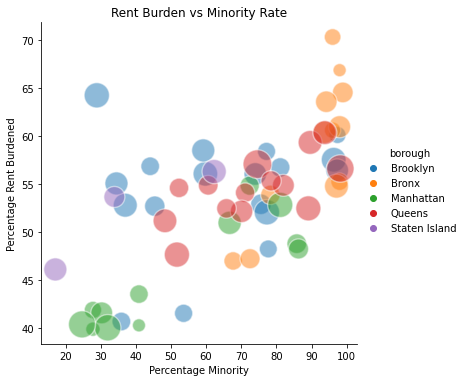

Slope of our linear model:  0.19
0.41692892961890093


In [155]:
size = housing_poverty['population'].to_numpy()
sns.relplot(x='minority_rate', y='rent_burdened', hue="borough", s = size/300, alpha=.5, data=housing_poverty)
plt.xlabel("Percentage Minority")
plt.ylabel("Percentage Rent Burdened")
plt.title('Rent Burden vs Minority Rate')
plt.show()

X = housing_poverty['minority_rate']
Y = housing_poverty['rent_burdened']

linear_model = LinearRegression()
x = []
nx = []
for n in X:
    nx.append(n)
    x.append(nx)
    nx = []
    
linear_model.fit(x, Y)

print('Slope of our linear model: ',round(linear_model.coef_[0],2))
print(r2_score(Y, linear_model.predict(x)))

From our visualization and regression scores, we see that there is a slight positive linear correlation between percentage of minorities and percentage rent burdened across the different boroughs.

### Analysis Three:

We will analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity may change based on race. 
We looked at a line plot that compared our average rent burden percents by borough.

#### Mean values for Columns

In [ ]:
print("Correlation between Asian and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[6], final_ds.corr().unstack()[7]))
print("Correlation between Black and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[14], final_ds.corr().unstack()[15]))
print("Correlation between Hispanic and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[22], final_ds.corr().unstack()[23]))
print("Correlation between White and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[30], final_ds.corr().unstack()[31]))

From these numbers, there is a correlation between race and students residing in temporary housing/residing in shelters. This shows a positive correlation with percentage of Black and Hispanic students with residing in temporary housing or in shelters. There was a negative correlation between the percentage of White and Asian students with residing in temporary housing or in shelters. 

In [ ]:
import statsmodels.api as sm

x = final_ds[["%_black", "%_hispanic", "%_asian", "%_white"]]
y = final_ds["%_students_in_temporary_housing"]

#ANOVA model 
model = sm.OLS(y, x).fit()
model.summary()

In [ ]:
x = final_ds[["%_asian","%_black", "%_hispanic", "%_white"]]
y = final_ds["%_students_in_temporary_housing"]
regressor = LinearRegression()
regressor.fit(x,y)         
y_pred = regressor.predict(x)
slope = np.around(regressor.coef_,2)
#print("Coefficient for asian: {}".format(slope[0]))
#print("Coefficient for black: {}".format(slope[1]))
#print("Coefficient for hispanic: {}".format(slope[2]))
#print("Coefficient for white: {}".format(slope[3]))
#score = np.around(regressor.score(x,y),2)
#print("R squared is {}".format(score))

In [ ]:
print("The mean Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].mean()))
print("The std of Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].std()))
print("\n")

print("The mean Black enrollment percentage is {:.2f}".format(final_ds["%_black"].mean()))
print("The std of Black enrollment percentage is {:.2f}".format(final_ds["%_black"].std()))
print("\n")

print("The mean Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].mean()))
print("The std of Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].std()))
print("\n")

print("The mean White enrollment percentage is {:.2f}".format(final_ds["%_white"].mean()))
print("The std of White enrollment percentage is {:.2f}".format(final_ds["%_white"].std()))
print("\n")

print("The mean poverty percentage is {:.2f}".format(final_ds["%_poverty"].mean()))
print("The std of poverty percentage is {:.2f}".format(final_ds["%_poverty"].std()))
print("\n")

#### Scatter Plots and Correlation

In [ ]:
print("The correlation is {:.2f}".format(final_ds["%_white"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_white"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("White Percentage")
plt.ylabel("Poverty")

In [ ]:
print("The correlation is {:.2f}".format(final_ds["%_asian"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_asian"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Asian Percentage")
plt.ylabel("Poverty")

In [ ]:
print("The correlation is {:.2f}".format(final_ds["%_hispanic"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_hispanic"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Hispanic Percentage")
plt.ylabel("Poverty")

In [ ]:
print("The correlation is {:.2f}".format(final_ds["%_black"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_black"],final_ds["%_poverty"],alpha = 0.3)
plt.xlabel("Black Percentage")
plt.ylabel("Poverty")

#### Relationship betwen mean student population and percent of unhoused students in each district per borough in scatterplots
The following scatterplots groups the dataframe by borough to show the relationship between mean student population and percent of students unhoused. Each point in the scatter plot is a district within the borough. We also found the correlation between both variables to see if student population size correlates with unhoused students. Each borough has their own scatter plot.

In [ ]:
by_bronx = final_ds.loc[final_ds["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_bronx["#_total_students"].corr(le_bronx["%_students_in_temporary_housing"])))

plt.scatter(le_bronx["#_total_students"], le_bronx["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Bronx")
plt.show()

In [ ]:
by_brooklyn = final_ds.loc[final_ds["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_brooklyn["#_total_students"].corr(le_brooklyn["%_students_in_temporary_housing"])))


plt.scatter(le_brooklyn["#_total_students"], le_brooklyn["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Brooklyn")
plt.show()


In [ ]:
by_manhattan = final_ds.loc[final_ds["borough"] == "Manhattan"]
le_manhattan = by_manhattan.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_manhattan["#_total_students"].corr(le_manhattan["%_students_in_temporary_housing"])))

plt.scatter(le_manhattan["#_total_students"], le_manhattan["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Manhattan")
plt.show()

In [ ]:
by_queens = final_ds.loc[final_ds["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_queens["#_total_students"].corr(le_queens["%_students_in_temporary_housing"])))
plt.scatter(le_queens["#_total_students"], le_queens["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Queens")
plt.show()

In [ ]:
by_SI = final_ds.loc[final_ds["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").sum()
plt.scatter(le_SI["#_total_students"], le_SI["%_students_in_temporary_housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Staten Island")
plt.show()

Hypothesis Testing - pt 2:

2) relationship between racial composition of schools and housing insecurity at the neighborhood/borough level

Null hypothesis: There is no correlation between racial composition of schools and housing insecurity
Alternative hypothesis: There is a correlation between ractial composition of schools and housing insecrurity. Aka some races will show greater housing insecurity compared to other races

From the p-values: we see that %Black, %Hispanic, and %White student population is correlated with percent of students in temporary housing. This means that percent Black/Hispanic with percent of students in temporate housing show a strong, positive, significant correlation. The percent White with percent of students in temporate housing shows a strong negative correlation. There is a weak to no correlation between percent Asian and percent of students in temporate housing. We can reject the null hypothesis with %Black, Hispanic, and White

# Questions for Reviewers
* Most of our visualizations and analyses look at scatterplots because we thought that was the best way to visualize the data. Are there any other forms of data analysis that would be more appropriate for our data?
* We changed one word from gross rent to rent level for our final report -- is that ok?